<a href="https://colab.research.google.com/github/Xoriian/Outliers/blob/main/Naives_Bayes_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importation des librairies

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from numpy import random

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importation des données

Variable pour l'utilisation du code dans Google Colab - Dans ce cas le jeu de données doit être dans le Drive !

In [52]:
# Récupération du contenu des différents datasets
# LES DONNÉES DOIVENT ÊTRE DANS UN FICHIER data DANS VOTRE DRIVE
train_data = pd.read_csv('/content/drive/My Drive/data/train_data.csv')
train_results = pd.read_csv('/content/drive/My Drive/data/train_results.csv')
test_data = pd.read_csv('/content/drive/My Drive/data/test_data.csv')

## Pré-processing des données

In [56]:
# Fusion des textes et des labels de train
train_all = pd.merge(train_data, train_results, on=["id"])

In [57]:
# Tout les textes des données d'entraînement et de test sont mis en lettres minuscules
train_all['text'] = train_all['text'].str.lower()
test_data['text'] = test_data['text'].str.lower()

## Séparation des données

In [58]:
X_train, X_val, y_train, y_val = train_test_split(train_all.text, train_all.target, test_size=0.20, random_state=42)

## Natural Language Processing (NLP)

In [60]:
# Paramétrisation des stopwords. Sachant que l'on doit classifier "l'humeur" du
# texte (positif, négatif, neutre), il ne faut pas inclure de mots désignant des
# négations dans la liste des mots à ne pas considérer

# Liste inspirée de celle de la librairie nltk
stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
             "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
             'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
             'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 
             'their', 'theirs', 'themselves', 'this', 'that', "that'll", 'these',
             'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 
             'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a',
             'an', 'the', 'and', 'but', 'if', 'as', 'of', 'at', 'by', 'for', 
             'with', 'about', 'into', 'through', 'during', 'to', 'from', 'in', 
             'then', 'here', 'there', 'own', 'same', 'so', 'than', 'can', 'will',
             'd', 'll', 'm', 'o', 're', 've', 'y']

In [61]:
# Initialisation du comptage de mots
count_vect = CountVectorizer()

In [62]:
# Entraînement et transformation des données d'entraînement en vecteur numérique
X_train_vect = count_vect.fit_transform(X_train)

In [64]:
# Transformation des données de validation en vecteur numérique de comptage de mots
X_val_vect = count_vect.transform(X_val)

## Entraînement du Multinomial Naive Bayes

In [66]:
#Training and Predicting the data
MNB = MultinomialNB(alpha = 2.0)
MNB.fit(X_train_vect,y_train)

MultinomialNB(alpha=2.0)

In [67]:
# Prédiction pour les données de validation
y_val_pred = MNB.predict(X_val_vect)

In [69]:
# Précision
print('Accuracy:', accuracy_score(y_val, y_val_pred))

Accuracy: 0.7791940018744142


In [70]:
# Rapport de classification
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

    negative       0.76      0.82      0.79    103891
     neutral       0.00      0.00      0.00        18
    positive       0.81      0.73      0.77    104156

    accuracy                           0.78    208065
   macro avg       0.52      0.52      0.52    208065
weighted avg       0.78      0.78      0.78    208065



In [71]:
# Matrice de confusion
print(confusion_matrix(y_val, y_val_pred))

[[85592     0 18299]
 [    6     0    12]
 [27623     2 76531]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Matrice de confusion du classifieur de Bayes')

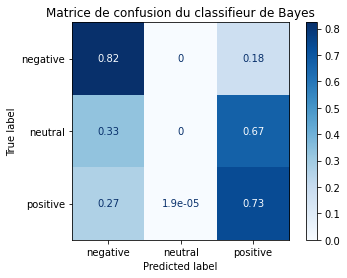

In [72]:
# Plot de la matrice de confusion
disp = plot_confusion_matrix(MNB, X_val_vect, y_val, normalize='true',cmap=plt.cm.Blues)
disp.ax_.set_title("Matrice de confusion du classifieur de Bayes")

## Prédiction pour les données de test

In [73]:
# Transformation des données de test en vecteur numérique de comptage de mots
X_test_vect = count_vect.transform(test_data.text)

In [75]:
# Prédiction pour les données de test
y_test_pred = MNB.predict(X_test_vect)

In [77]:
# Transformation des labels: de "positif", "neutre" et "négatif" à 0, 1, 2 respectivement
for i in range(len(y_test_pred)):
  if y_test_pred[i] == "negative":
    y_test_pred[i] = 0
  elif y_test_pred[i] == "neutral":
    y_test_pred[i] = 1
  else:
    y_test_pred[i] = 2

In [80]:
# Enregistrement dans le fichier submission.csv
my_submission = pd.DataFrame({'id': np.arange(0,y_test_pred.shape[0],1), 'target': y_test_pred})
my_submission.to_csv('NaiveBayes.csv', index=False)